# Proyek Analisis Data: [E-Commerce Public Dataset by Olist]
- **Nama:** Rifansyah Aditya Mahendra
- **Email:** rifansyahadityam97@gmail.com
- **ID Dicoding:** rifansyaham

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Dari daerah mana customer terbanyak berasal?
- Dari daerah mana penjual terbanyak berasal?

## Import Semua Packages/Library yang Digunakan

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [431]:
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [432]:

geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [433]:
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [434]:
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [435]:
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [436]:
orders_df = pd.read_csv('olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [437]:
products_df = pd.read_csv('olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [438]:
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [439]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [440]:
customer_df.info()
print("Jumlah Duplikasi : ", customer_df.duplicated().sum())
customer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah Duplikasi :  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [441]:
geolocation_df.info()
print("Jumlah Duplikasi : ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah Duplikasi :  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [442]:
order_items_df.info()
print("Jumlah Duplikasi : ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah Duplikasi :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [443]:
order_payments_df.info()
print("Jumlah Duplikasi : ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah Duplikasi :  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [444]:
order_reviews_df.info()
order_reviews_df.isna().sum()
print("Jumlah Duplikasi : ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah Duplikasi :  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [445]:
orders_df.info()
orders_df.isna().sum()
print("Jumlah Duplikasi : ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah Duplikasi :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [446]:
products_df.info()
products_df.isna().sum()
print("Jumlah Duplikasi : ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah Duplikasi :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [447]:
sellers_df.info()
print("Jumlah Duplikasi : ", sellers_df.duplicated().sum())
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah Duplikasi :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [448]:
product_category_name_translation_df.info()
print("Jumlah Duplikasi : ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah Duplikasi :  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- pada geolocation_df terdapat duplicated tada.
- pada order_items_df terdapat kesalahan tipe data shipping limit date.
- pada order_reviews_df terdapat kesalahan tipe data creation date, reiview answer timestamp dan terdapat missing value.
- pada orders_df terdapat kesalahan tipe data purchase timestamp, approved at,  delivered carrier date, delivered customere date, estimated delivery date dan juga terdapat missing value.
- pada products_df terdapat missing value.

### Cleaning Data

In [449]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah Duplikasi : ", geolocation_df.duplicated().sum())

Jumlah Duplikasi :  0


In [450]:
datetime_order_item = ["shipping_limit_date"]
for column in datetime_order_item:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [451]:
datetime_order_reviews = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_order_reviews:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [452]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]
order_reviews_df.fillna(value = "-", inplace=True)

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [453]:
datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_orders:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [454]:
orders_df[orders_df.order_approved_at.isna()]
orders_df.order_approved_at.fillna(orders_df.order_approved_at.mean(), inplace=True)

orders_df.isna().sum()

<ipython-input-454-7766cc99482e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_approved_at.fillna(orders_df.order_approved_at.mean(), inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [455]:
products_df[products_df.product_category_name.isna()]
products_df.product_category_name.fillna(products_df.product_category_name.mode()[0], inplace=True)
products_df.isna().sum()

<ipython-input-455-58aaf8dfc9bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(products_df.product_category_name.mode()[0], inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [456]:
products_df[products_df.product_name_lenght.isna()]
products_df[products_df.product_description_lenght.isna()]
products_df[products_df.product_photos_qty.isna()]
products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(), inplace=True)
products_df.product_description_lenght.fillna(products_df.product_description_lenght.median(), inplace=True)
products_df.product_photos_qty.fillna(products_df.product_photos_qty.median(), inplace=True)

products_df.isna().sum()

<ipython-input-456-17e77eb47fec>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(), inplace=True)
<ipython-input-456-17e77eb47fec>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [457]:
products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = \
products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].interpolate()

products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


## Exploratory Data Analysis (EDA)

### Explore ...

In [458]:
customer_city = customer_df.groupby("customer_city").agg(
    total_customer=("customer_id", "nunique"),  # Hitung jumlah unik seller_id
    customer_id=("customer_id", lambda x: list(x.unique()))  # Simpan daftar seller_id unik
).reset_index()

# Urutkan berdasarkan jumlah seller terbanyak
customer_city = customer_city.sort_values(by="total_customer", ascending=False)

print(customer_city)


       customer_city  total_customer  \
3597       sao paulo           15540   
3155  rio de janeiro            6882   
453   belo horizonte            2773   
558         brasilia            2131   
1143        curitiba            1521   
...              ...             ...   
1578          ibiara               1   
3164      rio espera               1   
3163  rio dos indios               1   
3162  rio dos cedros               1   
2059          lagoao               1   

                                            customer_id  
3597  [4e7b3e00288586ebd08712fdd0374a03, fd826e7cf63...  
3155  [5aa9e4fdd4dfd20959cad2d772509598, a7c125a0a07...  
453   [4b7139f34592b3a31687243a302fa75b, 19cecb194f5...  
558   [4fa19f7da692e6bf9602aaad3c372eda, e50a30de3c3...  
1143  [5adf08e34b2e993982a47070956c5c65, 237098a6467...  
...                                                 ...  
1578                 [7d79f5b2624829ec42de13f0f661ac04]  
3164                 [f1dbd5b4e2100112b354805ad704e604]

In [459]:
customer_state = customer_df.groupby(by="customer_state")["customer_id"].nunique().reset_index()
customer_state = customer_state.rename(columns={"customer_id": "total_customers"})
customer_state = customer_state.sort_values(by="total_customers", ascending=False)
print(customer_state)

   customer_state  total_customers
25             SP            41746
18             RJ            12852
10             MG            11635
22             RS             5466
17             PR             5045
23             SC             3637
4              BA             3380
6              DF             2140
7              ES             2033
8              GO             2020
15             PE             1652
5              CE             1336
13             PA              975
12             MT              907
9              MA              747
11             MS              715
14             PB              536
16             PI              495
19             RN              485
1              AL              413
24             SE              350
26             TO              280
20             RO              253
2              AM              148
0              AC               81
3              AP               68
21             RR               46


In [460]:
seller_state = sellers_df.groupby(by="seller_state")["seller_id"].nunique().reset_index()
seller_state = seller_state.rename(columns={"seller_id": "total_seller"})
seller_state = seller_state.sort_values(by="total_seller", ascending=False)
print(seller_state)

   seller_state  total_seller
22           SP          1849
15           PR           349
8            MG           244
20           SC           190
16           RJ           171
19           RS           129
6            GO            40
4            DF            30
5            ES            23
2            BA            19
3            CE            13
13           PE             9
12           PB             6
9            MS             5
17           RN             5
10           MT             4
18           RO             2
21           SE             2
0            AC             1
14           PI             1
1            AM             1
7            MA             1
11           PA             1


In [461]:
seller_city = sellers_df.groupby("seller_city").agg(
    total_seller=("seller_id", "nunique"),  # Hitung jumlah unik seller_id
    seller_ids=("seller_id", lambda x: list(x.unique()))  # Simpan daftar seller_id unik
).reset_index()

# Urutkan berdasarkan jumlah seller terbanyak
seller_city = seller_city.sort_values(by="total_seller", ascending=False)

print(seller_city)


        seller_city  total_seller  \
517       sao paulo           694   
159        curitiba           127   
450  rio de janeiro            96   
64   belo horizonte            68   
442  ribeirao preto            52   
..              ...           ...   
264           ivoti             1   
262       itirapina             1   
260   itau de minas             1   
257          itapui             1   
610           xaxim             1   

                                            seller_ids  
517  [c0f3eea2e14555b6faeea3dd58c1b1c3, 768a86e36ad...  
159  [ccc4bbb5f32a6ab2b7066a4130f114e3, 4dbd95a08b3...  
450  [ce3ad9de960102d0677a81f5d0bb7b2d, c240c406171...  
64   [2a1348e9addc1af5aaa619b1a3679d6b, 28a26ebce31...  
442  [791cfcfe22fe4a771ece27f90017da92, ebef8d8c92b...  
..                                                 ...  
264                 [04843805947f0fc584fc1969b6e50fe7]  
262                 [a7a9b880c49781da66651ccf4ba9ac38]  
260                 [23ff42c4bf1f8f16cddb1

In [462]:
merge_product_df = order_items_df.merge(products_df, on="product_id", how="left")
merge_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [463]:
most_sales_percategory_df = merge_product_df.groupby(by="product_category_name")["product_id"].count().reset_index()
most_sales_percategory_df = most_sales_percategory_df.rename(columns={"product_id" : "total_sold"})
most_sales_percategory_df = most_sales_percategory_df.sort_values(by="total_sold", ascending=False)
most_sales_percategory_df.head(10)

,product_category_name,total_sold
13,cama_mesa_banho,12718
11,beleza_saude,9670
32,esporte_lazer,8641
54,moveis_decoracao,8334
44,informatica_acessorios,7827
72,utilidades_domesticas,6964
66,relogios_presentes,5991
70,telefonia,4545
40,ferramentas_jardim,4347
8,automotivo,4235


In [464]:
least_percategory_df = merge_product_df.groupby(by="product_category_name")["product_id"].count().reset_index()
least_percategory_df = least_percategory_df.rename(columns={"product_id" : "total_sold"})
least_percategory_df = least_percategory_df.sort_values(by="total_sold", ascending=True)
least_percategory_df.head(10)

,product_category_name,total_sold
67,seguros_e_servicos,2
37,fashion_roupa_infanto_juvenil,8
60,pc_gamer,9
46,la_cuisine,14
17,cds_dvds_musicais,14
65,portateis_cozinha_e_preparadores_de_alimentos,15
4,artes_e_artesanato,24
35,fashion_esporte,30
15,casa_conforto_2,30
41,flores,33


In [465]:
revenue_percategory_df = merge_product_df.groupby(by="product_category_name")["price"].sum().reset_index()
revenue_percategory_df = revenue_percategory_df.rename(columns={"price" : "total_revenue"})
revenue_percategory_df = revenue_percategory_df.sort_values(by="total_revenue", ascending=False)
revenue_percategory_df.head(10)

,product_category_name,total_revenue
11,beleza_saude,1258681.34
13,cama_mesa_banho,1216523.96
66,relogios_presentes,1205005.68
32,esporte_lazer,988048.97
44,informatica_acessorios,911954.32
54,moveis_decoracao,729762.49
26,cool_stuff,635290.85
72,utilidades_domesticas,632248.66
8,automotivo,592720.11
40,ferramentas_jardim,485256.46


In [466]:
avg_percategory_df = merge_product_df.groupby(by="product_category_name")["price"].mean().reset_index()
avg_percategory_df = avg_percategory_df.rename(columns={"price" : "average_price"})
avg_percategory_df = avg_percategory_df.sort_values(by="average_price", ascending=False)
avg_percategory_df.head(10)

,product_category_name,average_price
61,pcs,1098.340542
64,portateis_casa_forno_e_cafe,624.285658
29,eletrodomesticos_2,476.124958
0,agro_industria_e_comercio,342.124858
45,instrumentos_musicais,281.616000
31,eletroportateis,280.778468
65,portateis_cozinha_e_preparadores_de_alimentos,264.568667
71,telefonia_fixa,225.693182
25,construcao_ferramentas_seguranca,208.992371
66,relogios_presentes,201.135984


In [467]:
customer_city.to_csv('cleaned_customer_data.csv', index=False)

merge_product_df.to_csv('cleaned_merge_product_data.csv', index=False)

seller_city.to_csv('cleaned_seller_city_data.csv', index=False)


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?


<ipython-input-468-5843f2193746>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


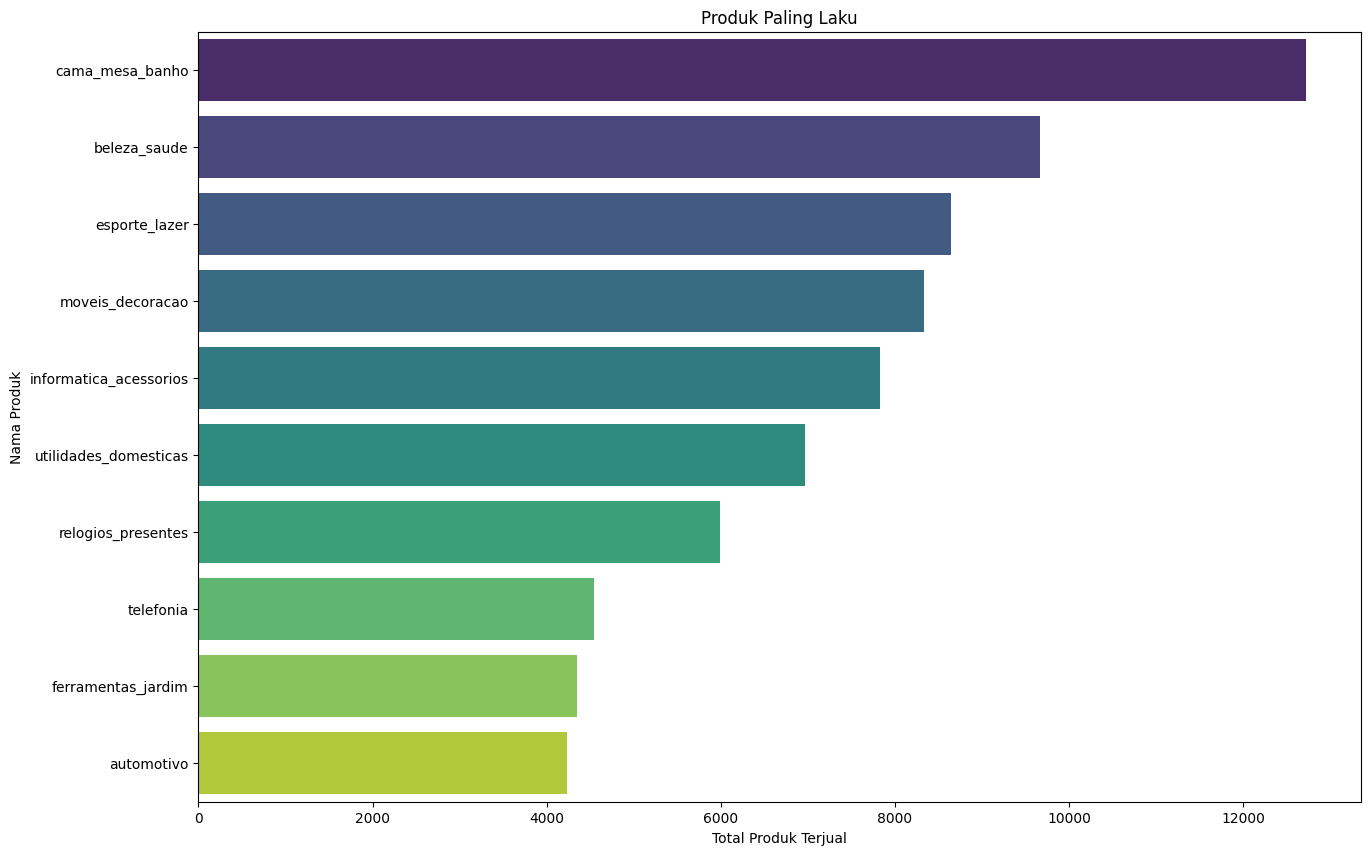

In [468]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=most_sales_percategory_df.head(10),
    x="total_sold",
    y="product_category_name",
    order=most_sales_percategory_df.product_category_name.head(10),
    palette="viridis"
 )
plt.xlabel("Total Produk Terjual")
plt.ylabel("Nama Produk")
plt.title("Produk Paling Laku")
plt.show()

<ipython-input-469-384e844c06f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


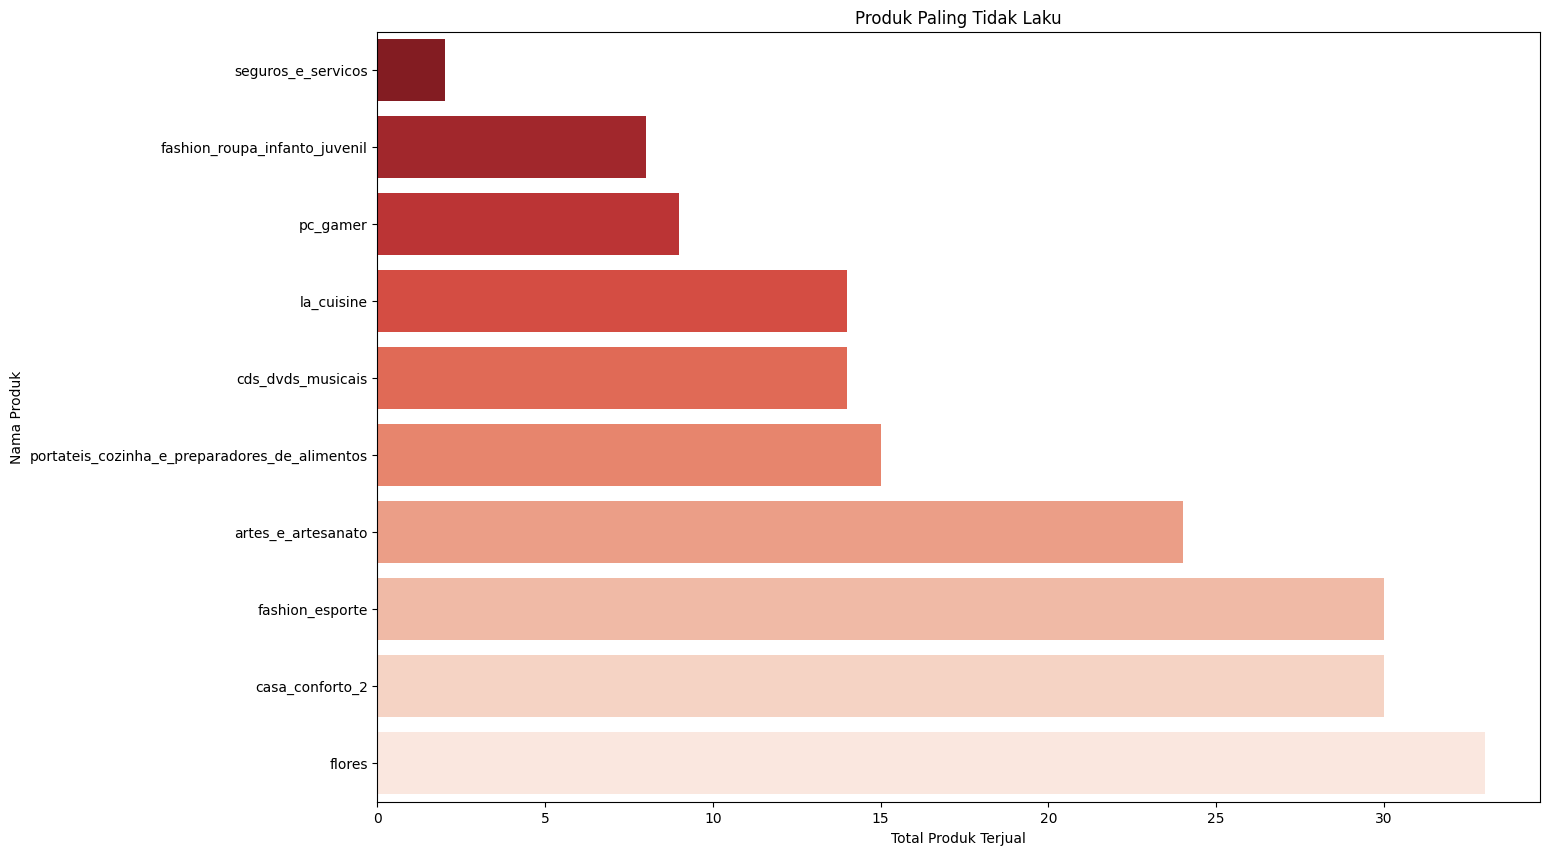

In [469]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=least_percategory_df.head(10),
    x="total_sold",
    y="product_category_name",
    order=least_percategory_df.product_category_name.head(10),
    palette = "Reds_r"
 )
plt.xlabel("Total Produk Terjual")
plt.ylabel("Nama Produk")
plt.title("Produk Paling Tidak Laku")
plt.show()

### Pertanyaan 2: Dari daerah mana customer terbanyak berasal?

<ipython-input-470-142abd437f33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


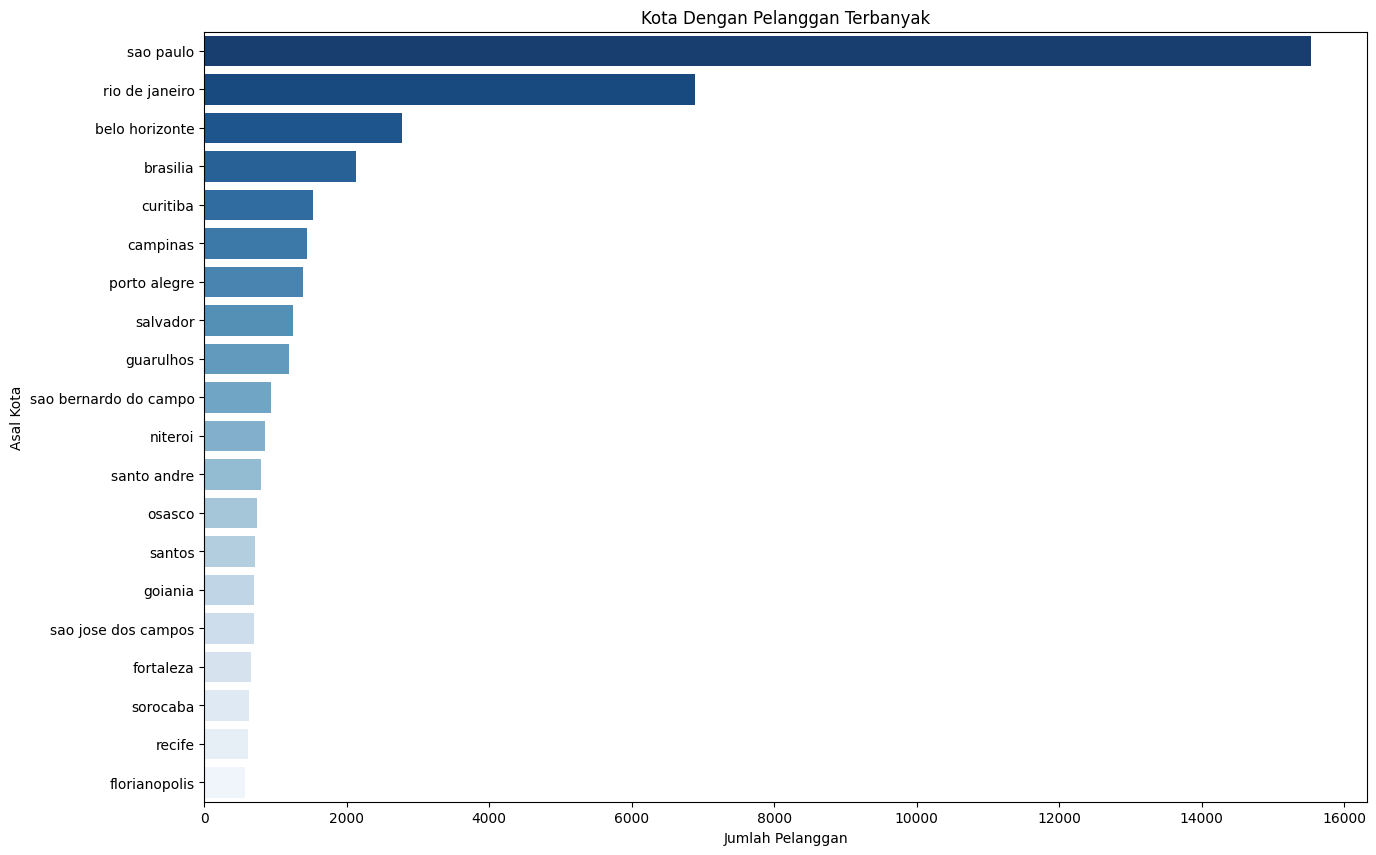

In [470]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=customer_city.head(20),
    x="total_customer",
    y="customer_city",
    legend=False,
    palette = "Blues_r",
 )
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Asal Kota")
plt.title("Kota Dengan Pelanggan Terbanyak")
plt.show()

### Pertanyaan 3 : Dari daerah mana penjual terbanyak berasal?

<ipython-input-471-adf59b2d03e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


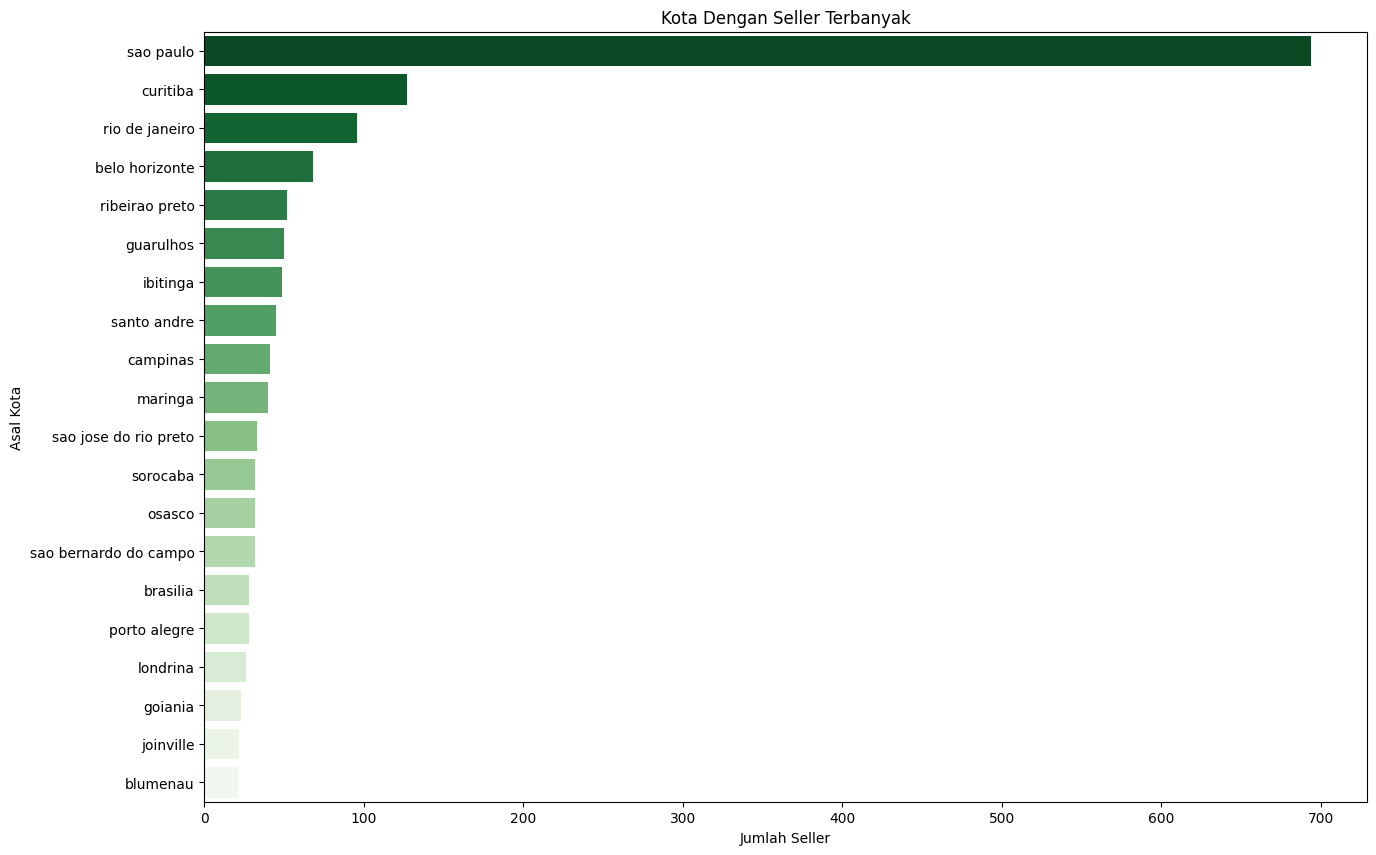

In [471]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=seller_city.head(20),
    x="total_seller",
    y="seller_city",
    legend=False,
    palette = "Greens_r",
 )
plt.xlabel("Jumlah Seller")
plt.ylabel("Asal Kota")
plt.title("Kota Dengan Seller Terbanyak")
plt.show()

**Insight:**
- kategori product paling laku adalah came_mesa_banho
- kategori product paling tidak laku adalah seguros_e_servicos
- kota dengan pelanggan dan penjual terbanyak ada di sal paulo


## Analisis Lanjutan (Opsional)

## Conclusion

- kategori product paling laku adalah came_mesa_banho dan  paling tidak laku adalah seguros_e_servicos
- demografi pelanggan tersebar di banyak kota dan yang terbanyak ada di sal paulo
- Kota dengan penjual terbanyak ada di sal paulo
- pada geolocation_df terdapat duplicated tada.
- pada order_items_df terdapat kesalahan tipe data shipping limit date.
-  order_reviews_df terdapat kesalahan tipe data creation date, reiview answer timestamp dan terdapat missing value.
- pada orders_df terdapat kesalahan tipe data purchase timestamp, approved at, delivered carrier date, delivered customere date, estimated delivery date dan juga terdapat missing value.
- pada products_df terdapat missing value.

